# Lab 3 - Lab Hardware Bringup and Testing
#### Lila Smith - February 15th, 2024

### Pre-lab

I had prior experience assembling PCBs, so I demonstrated most steps like applying paste and using pick-and-place for Sush before allowing him to do most surface mount components. I took care of setting up most of the sockets and using tape to hold them in place. We split the soldering about 50/50 for them. For almost all other throughole components, I soldered them into place. Together, we drilled and tapped the holes for the heatsink. I did the final resistor assembly as Sush was traveling.
<br>

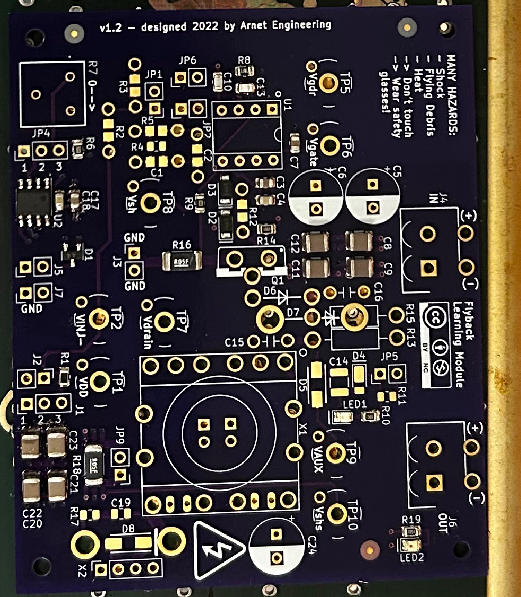
<center>Board coming out of the oven.</center>
<br>

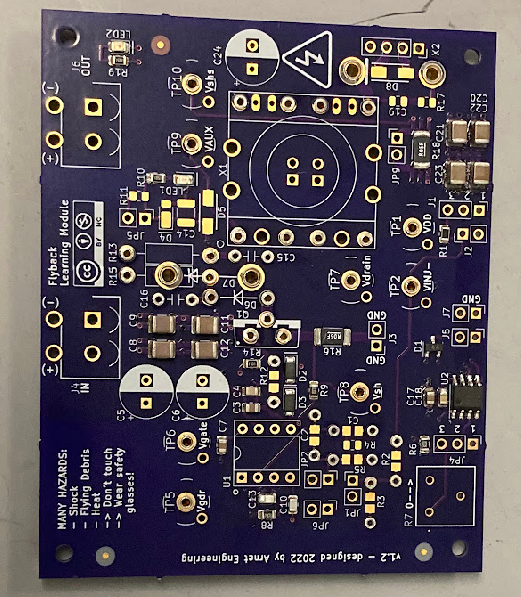
<center>Board with sockets in.</center>
<br>

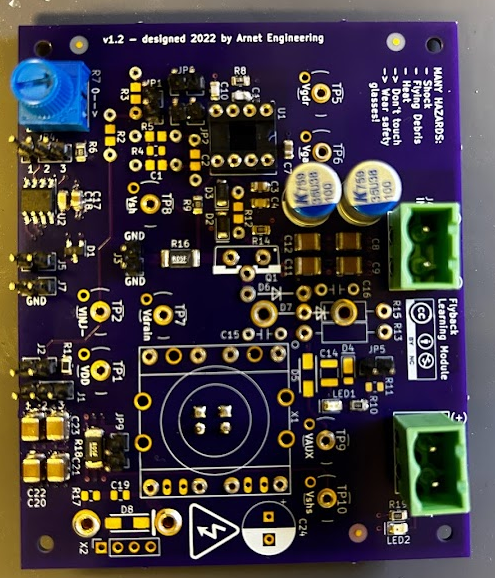
<center>Board with throughhole components in.</center>
<br>

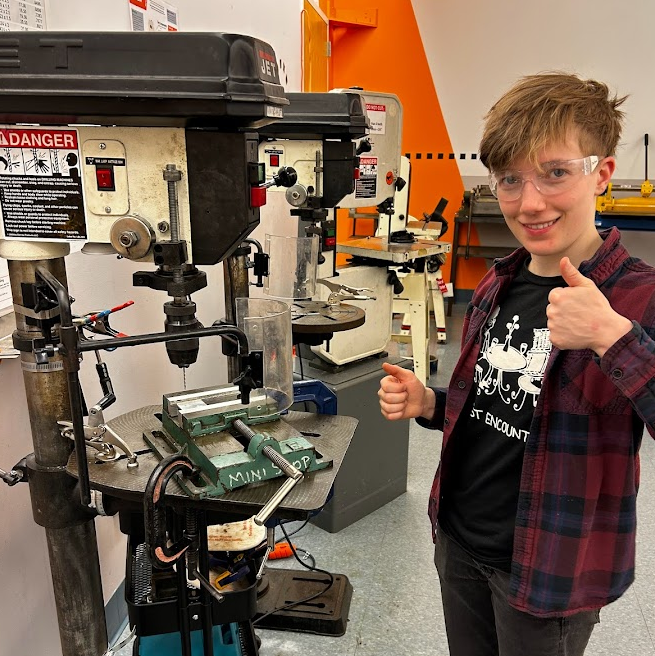 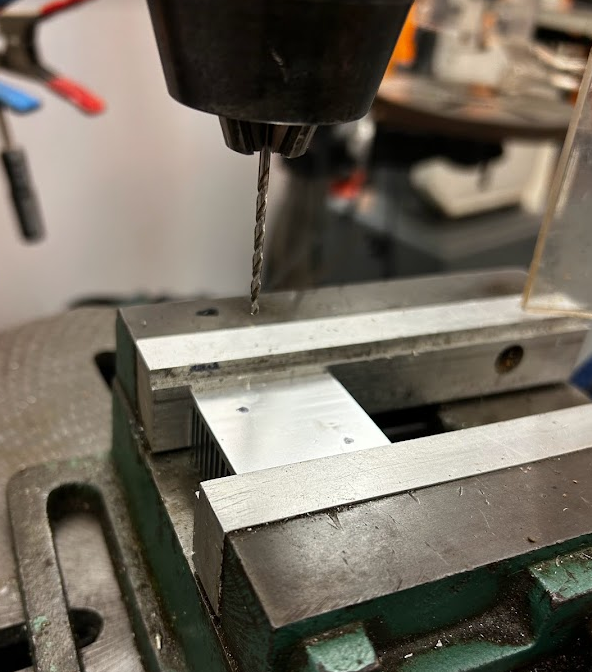
<center>Drilling holes for tapping.</center>
<br>

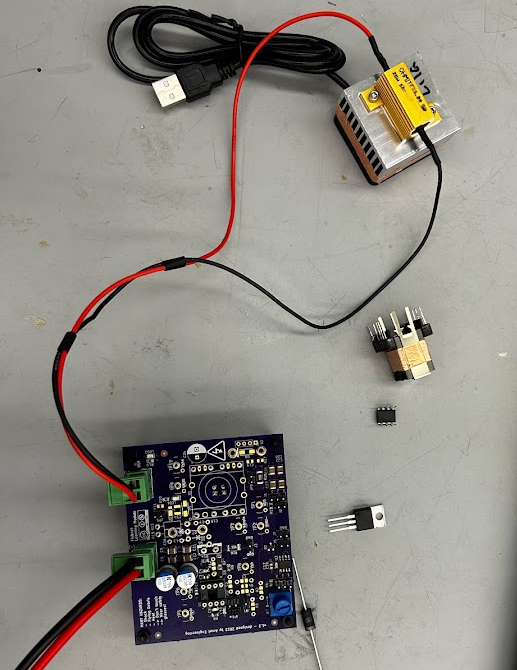
<center>Board ready for the lab!</center>

### Lab 3

Q1: Note the inductor number used.

Our inductor was labeled 4.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [231]:
def unpack_oscope(filepath):
    data = pd.read_csv(filepath)
    increment = float(data["Increment"][0])
    data = data.iloc[1: , :]
    data = data.astype(float)
    data["time"] = data["X"] * increment
    return data


def plot_task3(voltage):
    start_tick = 0
    end_tick = 15000
    
    data = unpack_oscope(f"../oscilloscope/task 3/buck_{str(voltage)}v.csv")
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    # Drain voltage
    ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5)
    # Shunt Voltage
    ax2.scatter(data["time"][start_tick:end_tick], 0.1 * data["CH2"][start_tick:end_tick], marker='.', s=0.5)

    ax1.sharex(ax2)
    ax1.title.set_text(f"Drain Voltage @ V={voltage}V")
    ax2.title.set_text(f"Shunt Voltage @ V={voltage}V")

    plt.show()
    
def plot_task4(voltage):
    start_tick = 0
    end_tick = -1
    
    data = unpack_oscope(f"../oscilloscope/task 4/buck_{str(voltage)}v.csv")
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    # Gate voltage
    ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5)
    # Gate to Drain Voltage
    ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.', s=0.5)

    ax1.title.set_text(f"Gate Voltage @ V={voltage}V")
    ax2.title.set_text(f"Gate to Drain Voltage @ V={voltage}V")
    fig.suptitle(f"V = {voltage} V")
        
    plt.show()
    
def plot_combined_task3(voltages):
    start_tick = 0
    end_tick = 15000
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    
    vdr = []
    vsh = []
    vdr_max = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../oscilloscope/task 3/buck_{str(voltage)}v.csv")
        # Drain voltage
        vdr.append(ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5))
        vdr[-1].set_label(f"Drain: {voltage} V")
        vdr_max.append(np.mean(data["CH1"][7900:8100]))
        # Shunt Voltage
        vsh.append(ax2.scatter(data["time"][start_tick:end_tick], 0.1 * data["CH2"][start_tick:end_tick], marker='.', s=0.5))
        vsh[-1].set_label(f"Shunt: {voltage} V")

    print(f"The maximum drain voltages are {vdr_max}, respectively.")
    ax1.sharex(ax2)
    ax1.title.set_text(f"Drain Voltage")
    ax2.title.set_text(f"Shunt Voltage")
    ax1.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    ax2.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    plt.show()
    
def plot_combined_task4(voltages):
    start_tick = 200
    end_tick = 9000
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    
    vdr = []
    vsh = []
    vg_max = []
    idr_max = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../oscilloscope/task 4/buck_{str(voltage)}v.csv")
        # Drain voltage
        vdr.append(ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5))
        vdr[-1].set_label(f"V = {voltage} V")
        vg_max.append(max(data["CH1"][start_tick:end_tick]))
        # Shunt Voltage
        current = (1/33) * np.subtract(np.array(data["CH1"][start_tick:end_tick]),
                              np.array(data["CH2"][start_tick:end_tick]))
        idr_max.append(max(abs(current)))
        vsh.append(ax2.scatter(data["time"][start_tick:end_tick], current, marker='.', s=0.5))
        vsh[-1].set_label(f"V = {voltage} V")

        
    ax1.sharex(ax2)
    ax1.title.set_text(f"Gate Voltage")
    ax2.title.set_text(f"Gate Current Voltage")
    ax1.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    ax2.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    
    print(f"The maximum gate voltage is {max(vg_max)} V.")
    print(f"The maximum driver source/sink current is {max(idr_max)} A.")
    plt.show()

def get_peak_current(voltages):
    start_tick = 6000
    end_tick = 6300
    
    vsh_max = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../oscilloscope/task 3/buck_{str(voltage)}v.csv")
        # Drain voltage
        vsh_max.append(0.1 * max(data["CH2"][start_tick:end_tick]))
    print(f"The peak shunt voltages are {vsh_max}, respectively. \n The peak currents are {20 * np.array(vsh_max)}, respectively.")


def plot_duty_cycle(voltages):
    start_tick = 1000
    end_tick = 6500
    
    Ts = 1/48059

    output_start = []
    output_end = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../oscilloscope/task 3/buck_{str(voltage)}v.csv")
        trimmed_time = data["time"][start_tick:end_tick]
        trimmed_data = data["CH1"][start_tick:end_tick]
        lows = np.array(trimmed_time[trimmed_data < 1])
        output_start.append(lows[0])
        output_end.append(lows[-1])
    
        
    duty_cycles = np.subtract(output_end, output_start) / Ts
    print(f"The duty cycles are {duty_cycles}, respectively.")


def get_dvdr_dt(voltage, plot):
    start_tick = 4800
    end_tick = 5700
    
    data = unpack_oscope(f"../oscilloscope/task 3/buck_{str(voltage)}v.csv")
    # compute slope m and intercept b
    m, b = np.polyfit(data["time"][start_tick:end_tick],
                      0.1 * data["CH2"][start_tick:end_tick], deg=1)

    if plot:
        # Plot
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
        # Drain voltage
        ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5)
        # Shunt Voltage
        ax2.scatter(data["time"][start_tick:end_tick], 0.1 * data["CH2"][start_tick:end_tick], marker='.', s=0.5)
        # Line of best fit
        # plot fitted I_PK = m*voltages + b
        plt.axline(xy1=(0.95e-5, 0.95e-5*m +b), slope=m, color='r', label=f'dvdr_dt = {m:.2f}(vcomp) {b:+.2f}')
        
        # Extras
        ax1.title.set_text(f"Gate Voltage @ V={voltage}V")
        ax2.title.set_text(f"Gate to Drain Voltage @ V={voltage}V")
        fig.suptitle(f"V = {voltage} V") 
        plt.show()
    return m

def get_inductance(voltages):
    R = 0.05 # Ohms
    L = []
    Vg = 18 # V
    
    for voltage in voltages:
        didt = get_dvdr_dt(voltage, False) / R
        L.append((Vg - voltage) / didt)
        
    return L, np.mean(L)
    


In [233]:
get_inductance([4, 7, 9])

([2.3875397221972672e-05, 2.534387980102612e-05, 2.42346119443208e-05],
 2.44846296557732e-05)

Q2: Use the measurements taken to determine the inductance value of the test inductor.

We know that our shunt resistor has a value of 0.05 $\Omega$ and that while the switch is open, the current through the shunt resistor is equal to the current through the inductor. 

$ V = L \, \frac{\text{d}}{\text{dt}} (I) $

From using the current ramp up across the inductor to find a slope above, I averaged 24.48 $\mu \text{H}$ from the 3 test output voltages.


Q3: Update your digital twin (PLECS model) with the inductance value. Make sure you submit your personal digital twin PLECS file 
with this lab report.


Simulation:

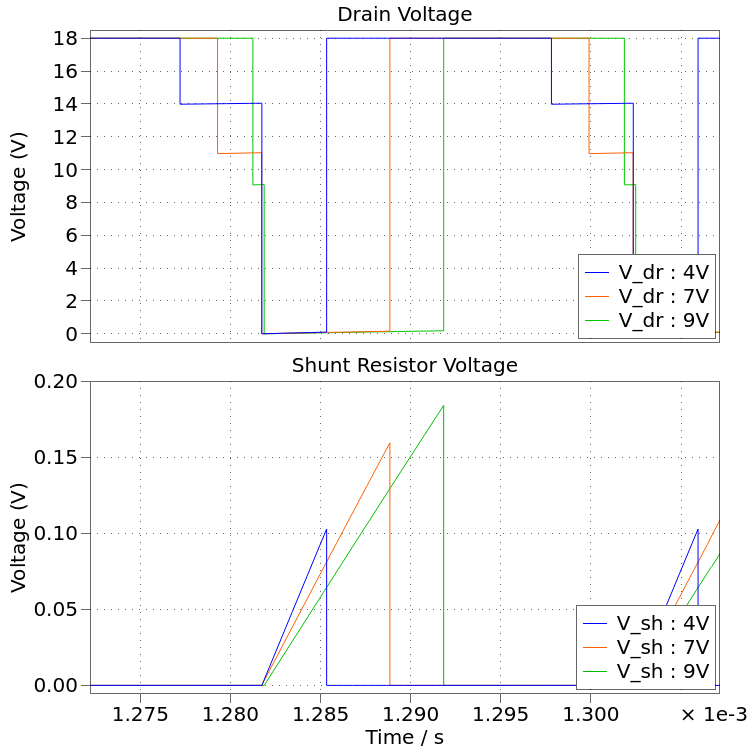

Q4: Run simulations corresponding to the measurements taken during Task 3 and compare the waveforms (shape, amplitude, timing, duty cycle) of the shunt-voltage and drain voltage.


1.5998e-05
1.5998e-05
1.5998e-05
The maximum drain voltages are [18.076, 18.073999999999998, 18.058999999999997], respectively.


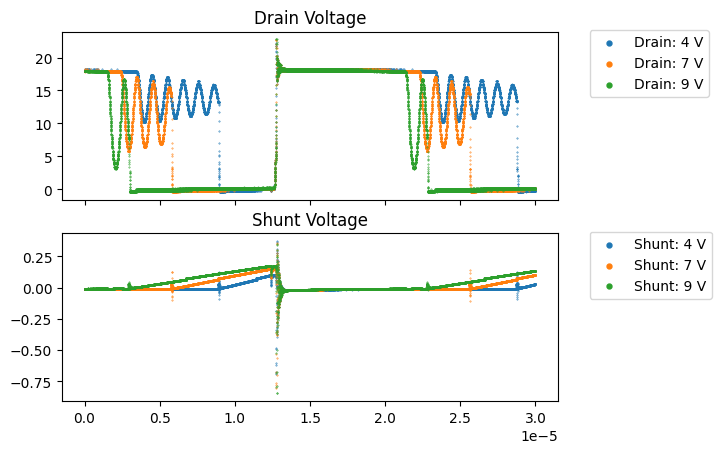

In [165]:
plot_combined_task3([4, 7, 9])

In [232]:
get_peak_current([4, 7, 9])

plot_duty_cycle([4,7,9])

The peak shunt voltages are [0.10400000000000001, 0.15200000000000002, 0.17600000000000002], respectively. 
 The peak currents are [2.08 3.04 3.52], respectively.
The duty cycles are [0.17647265 0.32757014 0.46338488], respectively.


The shapes of our drain voltages vary a lot. In simulation, it neatly steps down to $V_g - V$ when the voltage over the inductor is 0 V before falling to 0 V when the transistor turns on. When measured, we see a ringing behavior that corresponds to when the inductor current should be at 0V. Likely what is happening is that a parasitic capacitor is being charged by the voltage change as the inductor discharges its magnetic field. Then, the capacitor discharges which causes a current change that will charge the inductor. This cycle produces the ringing.

The amplitudes of the drain voltage curves approximately match is in simulation and on the bench. The maximum for simulation is 18 V, but the measured is about 18.08 V. The timing appears different between the two curves, but that is simply because our trigger for measurement was setup to match the rising edge of the drain voltage rather than in simulation where it corresponds to clock cycles in real time.

The amplitudes of the respective shunt voltages are very similar, at 0.10, 0.15, and 0.18 V for measured and 0.10, 0.16, 0.19 V for the simulation. Again, the timing appears to be different, but this is just due to how the data was captured. The shapes are also equivalent with very similar duty cycles that correspond with changes in the drain voltage.

Analyze the comparison and document your observations.

1. Q5: Are the simplifying assumptions made in our theoretical study of the buck converter valid?

The assumption that there is no parasitic capacitance does not appear to be valid as the ringing on the bench indicates an LC circuit is present. Modeling the transistor as a switch appears to work as we see that the duty cycles approximately match. 

2. Q6: Does the measured peak-current and duty-cycle match the theoretical predictions?

The peak-current and duty-cycle do not fully match the theoretical predictions, although they are relatively close. The peak current approximately matches for 4V and 7V but is lower for the measured for the 9V output.

The measured duty cycles are consistently lower than the simulated duty cycles. I am not sure of the exact reason, but it may correspond to more noise causing the isense line to be triggered more easily or the time required to drive the gate high. 


Theoretical Predictions
| Output Voltage | Peak Current | Duty Cycle |
|----------------|--------------|------------|
| 4 V            | 2.06 A       | 0.22       |
| 7 V            | 3.19 A       | 0.39       |
| 9 V            | 3.71 A       | 0.5        |

Measured
| Output Voltage | Peak Current | Duty Cycle |
|----------------|--------------|------------|
| 4 V            | 2.08 A       | 0.18       |
| 7 V            | 3.04 A       | 0.33       |
| 9 V            | 3.52 A       | 0.46       |


Use the measurements of Vgdr and Vgate taken during Task 4 to determine the gate current during turn-on and turn-off transitions.

Q7: Plot the gate voltage and gate current during MOSFET turn-on and turn-off for output voltages 4V, 7V and 9V.

The maximum gate voltage is 17.8 V.
The maximum driver source/sink current is 0.3575757575757576 A.


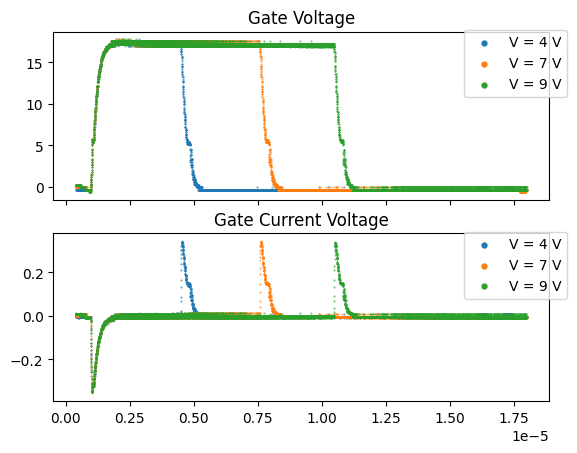

In [157]:
plot_combined_task4([4, 7, 9])

Q8: Are we respecting maximal allowable gate voltage for the MOSFET? Explain.

Per the [FDP61N10 datasheet](https://www.onsemi.com/pdf/datasheet/ntp52n10-d.pdf), the maximum allowed continuous Gate-to-Source voltage is $\pm$ 20 V. Our source is equal to our shunt resistor voltage which is a small positive voltage that can be approximated to 0 V. Since our gate voltage has a maximum of 17.8 V, the gate voltage minus the source voltage is always less than 20 V.

Q9: Are we respecting the maximal allowable output current of the UC2844? Explain.

Per the [UC2844 datasheet](https://www.ti.com/lit/ds/symlink/uc2844.pdf?ts=1708013037326&ref_url=https%253A%252F%252Fwww.ti.com%252Fproduct%252FUC2844%253Futm_source%253Dgoogle%2526utm_medium%253Dcpc%2526utm_campaign%253Dapp-hvp-null-44700045336317431_prodfolderdynamic-cpc-pf-google-wwe_int%2526utm_content%253Dprodfolddynamic%2526ds_k%253DDYNAMIC%2BSEARCH%2BADS%2526DCM%253Dyes%2526gad_source%253D1%2526gclid%253DCjwKCAiAibeuBhAAEiwAiXBoJHc2sb3fzVImZwQ4NGvozpdwVhAoApTxumefNbr6pNYvkCON-HbwlBoCivQQAvD_BwE%2526gclsrc%253Daw.ds), the maximum output current is 1A. Our maximum current is 0.36 A, which is far below the limit.